### GOAL 
> Coffee quality ranking by country <p>
> Top ten high-quality coffee suppliers <p>
> Global coffee suppliers <p>
> Important features for coffee quality prediction <p>

https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi

In [52]:
import pandas as pd 
import numpy as np 

from datetime import datetime

import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
df = pd.read_csv('Coffee_data.csv', index_col = 0)

In [54]:
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1163 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1089 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grading.D

> Total.Cup.Points: indicator of coffee quality --> sum of ten quality measure (from Aroma down to Total.Cup.Points) evaluated by CQI (Coffee Quality Insitute) certified reviewers for certification.

In [56]:
col_name = ['Owner', 'Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 
            'Aftertaste', 'Acidity','Body', 'Balance', 'Uniformity', 
            'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 
            'Moisture', 'Category.One.Defects', 'Category.Two.Defects', 
            'Quakers','Expiration', 'altitude_mean_meters']

data = df[col_name]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner                 1304 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Processing.Method     1159 non-null   object 
 3   Aroma                 1311 non-null   float64
 4   Flavor                1311 non-null   float64
 5   Aftertaste            1311 non-null   float64
 6   Acidity               1311 non-null   float64
 7   Body                  1311 non-null   float64
 8   Balance               1311 non-null   float64
 9   Uniformity            1311 non-null   float64
 10  Clean.Cup             1311 non-null   float64
 11  Sweetness             1311 non-null   float64
 12  Cupper.Points         1311 non-null   float64
 13  Total.Cup.Points      1311 non-null   float64
 14  Moisture              1311 non-null   float64
 15  Category.One.Defects  1311

### CLEANING DATA 

In [57]:
data[data['Owner'].isnull()]

,Owner,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
365,NaN,Honduras,Natural / Dry,7.67,7.50,7.67,7.50,7.67,7.67,10.0,10.0,10.0,7.83,83.50,0.10,0,3,0,"April 8th, 2015",1350.0
460,NaN,Honduras,Natural / Dry,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50,83.17,0.11,0,3,0,"April 8th, 2015",1350.0
603,NaN,Colombia,Washed / Wet,7.50,7.58,7.42,7.67,7.50,7.58,10.0,10.0,10.0,7.50,82.75,0.00,0,0,0,"April 11th, 2013",1625.0
849,NaN,Honduras,Natural / Dry,7.50,7.50,7.33,7.33,7.33,7.33,10.0,10.0,10.0,7.50,81.83,0.10,0,4,0,"May 16th, 2015",1350.0
883,NaN,Honduras,Natural / Dry,7.50,7.33,7.50,7.50,7.17,7.17,10.0,10.0,10.0,7.50,81.67,0.10,0,5,0,"May 16th, 2015",1400.0
976,NaN,Honduras,Natural / Dry,7.42,7.33,7.00,7.42,7.33,7.33,10.0,10.0,10.0,7.33,81.17,0.13,0,1,0,"March 10th, 2016",1450.0
1045,NaN,Honduras,Natural / Dry,7.25,7.33,7.08,7.50,7.25,7.33,10.0,10.0,10.0,7.00,80.75,0.13,0,1,0,"March 10th, 2016",1450.0


In [58]:
df[(df['Country.of.Origin'] == "Honduras") & (df['Owner'].isnull())]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
365,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-240,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
460,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-193,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
849,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-311,cigrah,1350,comayagua,...,Green,4,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
883,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-192,cigrah,1400,comayagua,...,Green,5,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
976,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-037,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
1045,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-035,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0


In [59]:
df[(df['Country.of.Origin'] == "Honduras") & (df['Farm.Name'] == 'los hicaques')]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,Arabica,bismarck castro,Honduras,los hicaques,102,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,3,"May 18th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
183,Arabica,bismarck castro,Honduras,los hicaques,76,dry mill,13-111-032,cigrah s.a de c.v,1500,central region,...,Green,2,"April 4th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
317,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13 / 111 / 053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
365,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-240,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
460,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-193,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
589,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,6,"April 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
706,Arabica,bismarck castro,Honduras,los hicaques,63,cigrah s.a de c.v.,13-111-022,cigrah s.a de c.v,1396,comayagua,...,Green,8,"April 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1396.0,1396.0,1396.0
818,Arabica,bismarck castro,Honduras,los hicaques,63,cigrah s.a de c.v.,13-111-022,cigrah s.a de c.v,1400,comayagua,...,Green,1,"June 1st, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
976,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-037,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
1045,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-035,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0


In [60]:
# We found that 4 null value in Owner have Farm.name = los hicaques, replace it
data.loc[(data['Country.of.Origin'] == "Honduras") & (data['Owner'].isnull()), 'Owner'] = "bismarck castro"

In [61]:
df[(df['Country.of.Origin'] == "Honduras") & (df['Farm.Name'] == 'gran manzana y el aguacate')]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
849,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-311,cigrah,1350,comayagua,...,Green,4,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
883,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-192,cigrah,1400,comayagua,...,Green,5,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [62]:
df[(df['Country.of.Origin'] == "Colombia") & (df['Owner'].isnull())]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
603,Arabica,NaN,Colombia,supply chain ecom cca s.a.,NaN,south huila,3-79-0334,ecom cca s.a.,1400 thru 1850,south huila,...,Blue-Green,0,"April 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1400.0,1850.0,1625.0


In [63]:
df[(df['Country.of.Origin'] == "Colombia") & (df['Farm.Name'] == "supply chain ecom cca s.a.")]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
603,Arabica,NaN,Colombia,supply chain ecom cca s.a.,NaN,south huila,3-79-0334,ecom cca s.a.,1400 thru 1850,south huila,...,Blue-Green,0,"April 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1400.0,1850.0,1625.0


In [64]:
# There is only one missing value in Colombia with Farm Name supply chain ecom cca s.a
# and two missing values in Honduras with Farm name gran manzana y el aguacate
# we replace it with its company name 

data.loc[603, 'Owner'] = "ecom cca s.a."

data.loc[[849, 883], 'Owner'] = "cigrah"

In [65]:
data['Owner'].isnull().sum()

0

In [66]:
data.isnull().sum()

Owner                     0
Country.of.Origin         1
Processing.Method       152
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Category.Two.Defects      0
Quakers                   0
Expiration                0
altitude_mean_meters     93
dtype: int64

In [67]:
data[data['Country.of.Origin'].isnull()]

,Owner,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
1198,racafe & cia s.c.a,NaN,NaN,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,79.08,0.1,0,3,0,"February 29th, 2012",NaN


In [68]:
# drop this row as it contains null values in other important features also 
data.drop(index = 1198, inplace = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_8393/955512508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index = 1198, inplace = True)


In [69]:
data.tail(5)

,Owner,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
1307,juan carlos garcia lopez,Mexico,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0,20,0,"September 17th, 2013",900.00
1308,myriam kaplan-pasternak,Haiti,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8,16,0,"May 24th, 2013",350.00
1309,"exportadora atlantic, s.a.",Nicaragua,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,63.08,0.13,1,5,0,"June 6th, 2018",1100.00
1310,juan luis alvarado romero,Guatemala,Washed / Wet,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,59.83,0.10,0,4,0,"May 24th, 2013",1417.32
1312,bismarck castro,Honduras,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0,2,0,"April 28th, 2018",1400.00


In [70]:
#We also drop the last row as it contains mostly 0 values.
data.drop(index=1312, inplace=True) 

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_8393/2283482199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=1312, inplace=True)


### FEATURE ENGINEERING

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1310
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner                 1309 non-null   object 
 1   Country.of.Origin     1309 non-null   object 
 2   Processing.Method     1159 non-null   object 
 3   Aroma                 1309 non-null   float64
 4   Flavor                1309 non-null   float64
 5   Aftertaste            1309 non-null   float64
 6   Acidity               1309 non-null   float64
 7   Body                  1309 non-null   float64
 8   Balance               1309 non-null   float64
 9   Uniformity            1309 non-null   float64
 10  Clean.Cup             1309 non-null   float64
 11  Sweetness             1309 non-null   float64
 12  Cupper.Points         1309 non-null   float64
 13  Total.Cup.Points      1309 non-null   float64
 14  Moisture              1309 non-null   float64
 15  Category.One.Defects  1309

In [72]:
data['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [73]:
# Dummy coding Processing Method

dummies = pd.get_dummies(data['Processing.Method'], dummy_na = True).astype(int)
dummies.head()

,Natural / Dry,Other,Pulped natural / honey,Semi-washed / Semi-pulped,Washed / Wet,NaN
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,0,1,0


In [74]:
data = pd.concat([data, dummies], axis = 1)

In [75]:
data.loc[data['altitude_mean_meters'].isnull(), 'altitude_mean_meters'] = data.groupby('Country.of.Origin')['altitude_mean_meters'].transform('mean')

### EXPLORATORY DATA ANALYSIS 

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1310
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Owner                      1309 non-null   object 
 1   Country.of.Origin          1309 non-null   object 
 2   Processing.Method          1159 non-null   object 
 3   Aroma                      1309 non-null   float64
 4   Flavor                     1309 non-null   float64
 5   Aftertaste                 1309 non-null   float64
 6   Acidity                    1309 non-null   float64
 7   Body                       1309 non-null   float64
 8   Balance                    1309 non-null   float64
 9   Uniformity                 1309 non-null   float64
 10  Clean.Cup                  1309 non-null   float64
 11  Sweetness                  1309 non-null   float64
 12  Cupper.Points              1309 non-null   float64
 13  Total.Cup.Points           1309 non-null   float64
 1

In [80]:
top_10_country = data.groupby('Country.of.Origin')['Total.Cup.Points'].mean().sort_values(ascending = False).head(10)

In [81]:
top_10_country

Country.of.Origin
United States       85.978750
Papua New Guinea    85.750000
Ethiopia            85.484091
Japan               84.670000
Kenya               84.309600
Uganda              84.051923
Ecuador             83.830000
Panama              83.707500
Colombia            83.106557
El Salvador         83.052857
Name: Total.Cup.Points, dtype: float64

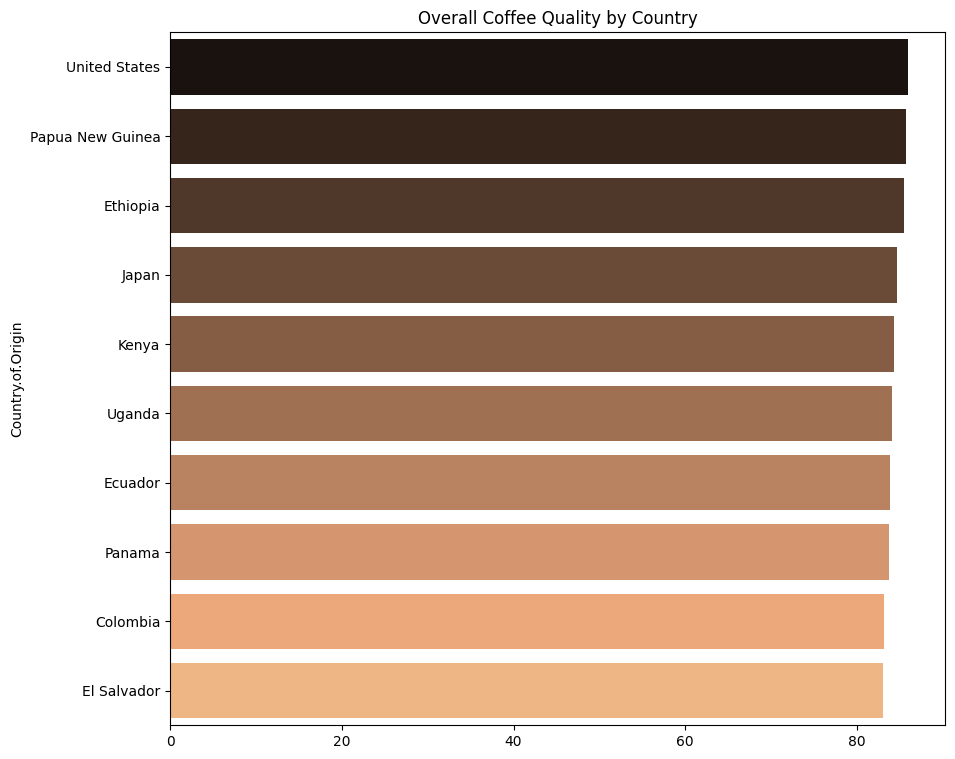

In [93]:
plt.figure(figsize = (10,9))

plt.title('Overall Coffee Quality by Country')

sns.barplot(y = top_10_country.index, x = top_10_country.values, palette="copper")

plt.show() 

In [96]:
top_10_supplier = data.groupby('Owner')['Total.Cup.Points'].mean().sort_values(ascending = False).head(10)

In [97]:
top_10_supplier

Owner
metad plc                             89.776667
yidnekachew dabessa                   89.000000
hugo valdivia                         88.750000
diamond enterprise plc                88.250000
mohammed lalo                         88.080000
ji-ae ahn                             87.955000
cqi q coffee sample representative    87.320000
roberto licona franco                 87.170000
nora zeas                             86.580000
specialty coffee-korea                86.500000
Name: Total.Cup.Points, dtype: float64

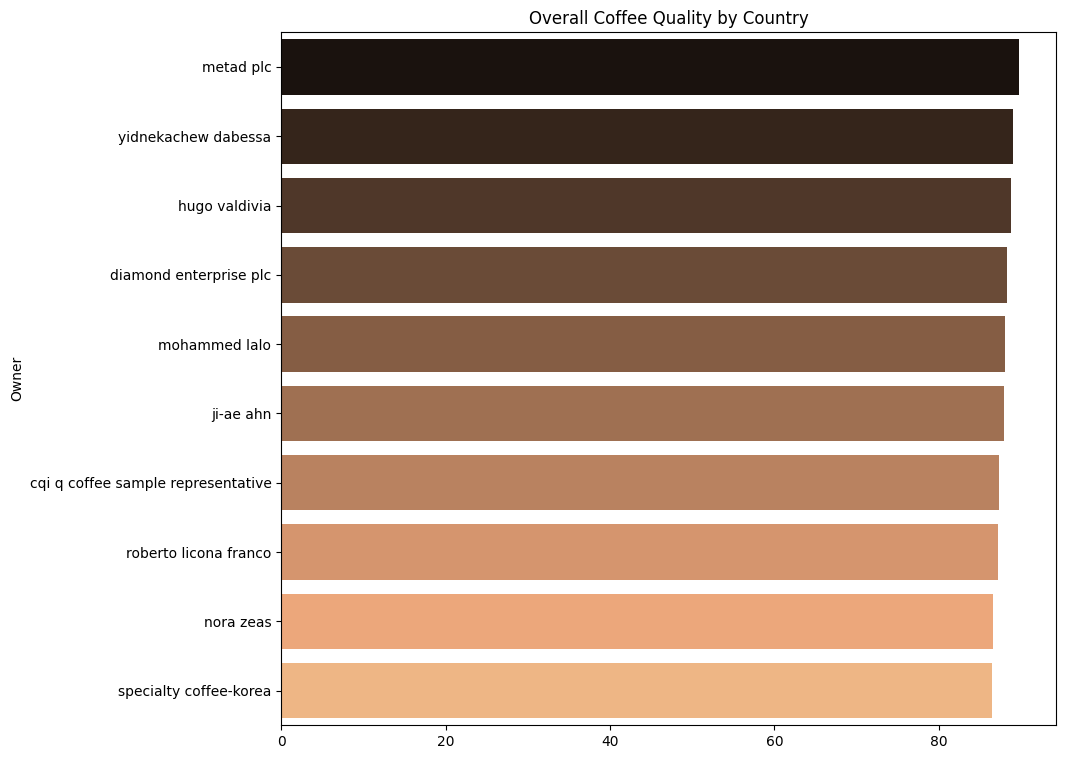

In [98]:
plt.figure(figsize = (10,9))

plt.title('Overall Coffee Quality by Country')

sns.barplot(y = top_10_supplier.index, x = top_10_supplier.values, palette="copper")

plt.show() 

In [100]:
import geopandas as gpd